# Generative Adversarial Networks in Slanted Land

**Author: Jessica Cervi**


## Activity Overview 

Generative adversarial networks (GANs) are a clever way of training a generative model by framing the problem as a supervised learning problem. The GAN model architecture involves two sub-models:

- Generator: to generate new plausible examples from the problem domain.
- Discriminator: to classify examples as real (from the domain) or fake (generated).

When training begins, the generator produces obviously fake data, and the discriminator quickly learns to tell that it's fake. As training progresses, the generator gets closer to producing output that can fool the discriminator.
Finally, if the generator training goes well, the discriminator gets worse at telling the difference between real and fake. It starts to classify fake data as real, and its accuracy decreases.



For this activity, we have adapted the code in [this](https://github.com/luisguiserrano/gans) GitHub repository, where you can also find a link to a YouTube video that provides useful insight on the code.

In this notebook, we build a very simple pair of GANs where the data consists of 2x2 black and white images, where the images we want to generate (the faces) are backwards diagonals (\\). Our goal is to define a GANs that is able to distinguish a real image from a fake one.


This assignment is designed to help you apply the machine learning algorithms you have learned using packages in `Python`. `Python` concepts, instruction, and starter code are embedded within this Jupyter Notebook to help guide you as you progress through the assignment. Remember to run the code of each code cell prior to submitting the assignment. Upon completing the assignment, we encourage you to compare your work against the solution file to perform a self-assessment.



## Index:

#### Week 7:    Generative Adversarial Networks in Slanted Land


- [Part 1](#part1)-  Importing the Libraries and Defining Auxiliary Functions
- [Part 2](#part2)-  Problem Setup
- [Part 3](#part3)-  Generating Noise (fake) Faces
- [Part 4](#part4)-  Defining the Probability Function
- [Part 5](#part5)-  Defining the Discriminator
- [Part 6](#part6)-  Defining the Generator
- [Part 7](#part7)-  Training the Network

## Generative Adversarial Networks in Slanted Land

[Back to top](#Index:) 

<a id='part1'></a>

### Part 1 -  Importing the Libraries and Defining Auxiliary Functions

A `Python` library, or module, is a reusable collection of code defined to carry out specific tasks without writing your own code. 

Depending on the set of tasks you wish to accomplish, you can import as many different libraries as you wish.

In the code cell below, we have imported the libraries that we will be using in this activity.


In [3]:
# Imports

import numpy as np #importing numpy and aliasing it as np for convenince
from numpy import random #importing the submodule random from numpy
from matplotlib import pyplot as plt #importing the submodule pyplot from matplotlib and aliasing that as plt


#this line is needed to display images within a Jupyter Notebok
%matplotlib inline 

At the beginning of your coding project, it's good practice to write any user-defined auxiliary function that you may use later in your code. This way, your code is structured and it becomes easier to read for other users.

You can think of `Python` functions as a self-contained bundle of code used to carry out specific tasks. Functions can be defined for you within a library. For very specific tasks, you may need to define a function on your own. These are called user-defined functions and they have the following general structure:

```Python
def function_name(parameters):
    """
    optional description of the function
    """
    statement(s)
    return
```

Where:

- The keyword `def` that marks the start of the function header.
- A function name that uniquely identifies the function. 
- Parameters through which we pass values to a function. Depending on the function, they can be optional.
- A colon (:) that marks the end of the function header.
- Optional documentation string (docstring) which describes what the function does.
- One or more valid `Python` statements that make up the function body. Statements must have the same indentation level. They define the task(s) that your function is supposed to execute.
- An optional return statement which returns a value from the function.


#### The `view_samples` function

In the code cell, we have defined the function `view_samples` used to generate and display subplots with desired characteristics. This function takes three arguments, `samples`, `m`, and `n`, where:

- `samples` contains the values we wish to plot
- `m` is the number of rows we desire to display the subplots on
- `n` is the number of columns we desire to display the subplots on

This function unpacks the values we wish to plot into the desired number of subplots and creates each one of them without axis and using the black-and-white gradient colormap.

In [4]:
##### Drawing function

def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((2,2)), cmap='Greys_r')  
    return fig, axes

[Back to top](#Index:) 

<a id='part2'></a>

### Part 2 - Problem setup

In this very simple example, we will  build a very simple pair of GANs directly in `Python` without the use of any deep learning library.

As we have seen in the YouTube video, in this Slanted Land world, the characters look slightly elongated to a 45 degree angle and are represented by 2X2 black-and-white pixel screens.

In the code below, we have used the function `array` to create four characters. Notice that, because each face is identified by 4 pixel, each array contains four values between 0 and 1.

In the code cell below, practice modifying the definition of the **second** face from the left using the values `0.8, 0.1, 0.2, 0.9`.

In [5]:
# Examples of faces
faces = [np.array([1,0,0,1]),
         np.array([0.9,0.1,0.2,0.8]),
         np.array([0.9,0.2,0.1,0.8]),
         np.array([0.8,0.1,0.2,0.9]),
         np.array([0.8,0.2,0.1,0.9])]
    

Next, we would like to visualize the faces we have just created by using the function `view_samples` that we have defined above.

In the code cell below, we have decided to visualize the values generated above in one row and four columns.


It is possible to tell real faces apart from fake ones by noticing that top-left and the bottom-right corners
have large values because the pixels are dark, whereas the other two corners have small
values and therefore their pixels are light. Notice that the values are not always exactly 0 and 1 because we can have noisy images.



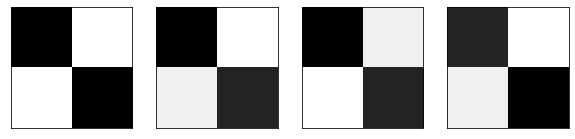

In [6]:
faces_view = view_samples(faces, 1, 4)

**Question:**

1) In the case where we wanted to visualize the faces on two rows and two columns, how would you need to change the values of `m` and `n` in `view_samples`? Feel free to practice your answer by modifying the code cell above.

2) Suppose we generated 12 faces and we wanted to display them on four rows and three columns. What would the values of `m` and `n` be in this case?



**CLICK ON THIS CELL TO TYPE YOUR ANSWER**


[Back to top](#Index:) 

<a id='part3'></a>

### Part 3 - Generating Noise (Fake) Faces

The next section of this activity focuses on generating random images, which don't correspond to faces.

In the code cell below, we have created 20 images, each one with four pixels. The function `generate_random_image` generates a random number for each one of the four pixels.


In the code cell below, practice modifying the code so that it generates 25 random images.

In [7]:
# Examples of noisy images
noise = [np.random.randn(2,2) for i in range(20)]
def generate_random_image():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]



In a similar way as we did in Part 2, we use the function `view_samples` to visualize the fake faces we have generated above.

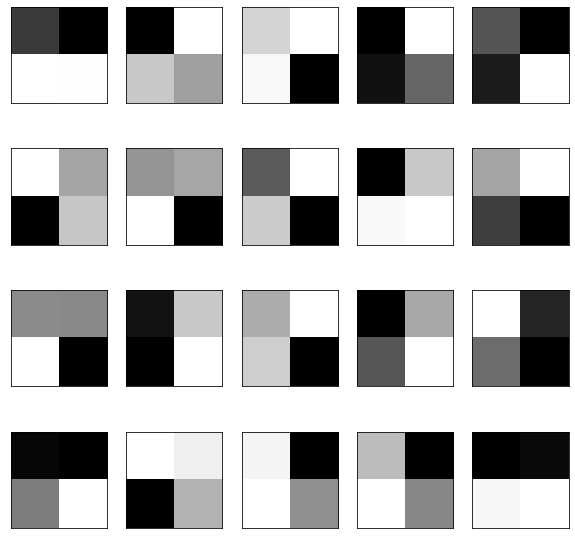

In [8]:
noise_view = view_samples(noise, 4,5)

As you may notice, each one of the images below is a lot more noisy than the ones we have defined in Part 2, and some of them don't have  higher values on the diagonal as real faces.

**Question:**

Assuming you generate 25 fake images, and you wanted to display them on a 5X5 grid, how would you change the parameters in the code cell above? Feel free to test your answer by modifying the code cell above.

**CLICK ON THIS CELL TO TYPE YOUR ANSWER**

#### Distinguishing faces from noise

How can we distinguish a real face from a fake one?

As a rule of thumb for this exercise, all we need to do is sum the value in the top-left and bottom-right corners and subtract  the sum of the values in the top-right and bottom-left corners.

In a real face, this score will be high, whereas in a noisy image will be low.
<img src="./images/face_vs_noise.png" alt="Drawing" style="width: 600px;"/>


[Back to top](#Index:) 

<a id='part4'></a>

### Part 4 - Defining the Probability Function

One way of calculating the probability that an image is real or fake is by making use of the sigmoid function.


<img src="./images/sigmoid.png" alt="Drawing" style="width: 400px;"/>

As we can see from the image above, the sigmoid function takes values close to 1 when `x` is high and close to 0 when `x` is low.

For example, an image with score 1 (x=1) takes a value for the sigmoid function equal to 0.73. We can interpret this as a 73% probability that the discriminator will consider this image real.

In the code cell below, we have defined a function `sigmoid`, which takes as input a value `x` and evaluates it according to the mathematical definition of the function to compute the probability.

In [9]:
# The sigmoid activation function
def sigmoid(x):
    return np.exp(x)/(1.0+np.exp(x))

As an exercise, in the code cell below, we call the function `sigmoid` with the value 1.

In [11]:
sigmoid(1)

0.7310585786300049

**Question:**

If an image has a score of 1.5, what is the probability that the discriminator will recognize that image as real? Feel free to practice your answer by using the code cell above.

**CLICK ON THIS CELL TO TYPE YOUR ANSWER**



[Back to top](#Index:) 

<a id='part5'></a>

### Part 5 - Defining the Discriminator

In this section, we will focus on defining the discriminator for our algorithm.

The discriminator in a GAN is simply a classifier. It tries to distinguish real data from fake data created by the generator. 

Therefore, the discriminator training data comes from two sources:

- Real data instances, such as real pictures of people. The discriminator uses these instances as positive examples during training
- Fake data instances created by the generator. The discriminator uses these instances as negative examples during training

During the discriminator training:

- 1) The discriminator classifies both real data and fake data from the generator
- 2) The discriminator loss function penalizes the discriminator for misclassifying a real instance as fake or a fake instance as real
- 3) The discriminator updates its weights through backpropagation from the discriminator loss function through the discriminator network

#### Coding the discriminator 


The code provided in the code cell below provides the complete definition for the discriminator. Note that the code starts with the keyword `class`. `Python` classes provide a means of bundling data and functionality together, which belong to the object defined by the class (in this case, `Discriminator`). 

We notice that because the discriminator takes data from real and fake images, we have functions to compute the error and update the weights for both cases.

**NOTE: The code below can be quite advanced if you have no prior coding knowledge. For this reason, details are left out.**

In [12]:
class Discriminator():
    def __init__(self):
        #self.weights = np.array([0.0 for i in range(4)])
        #self.bias = 0.0
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.bias = np.random.normal()
    
    def forward(self, x):
        # Forward pass
        return sigmoid(np.dot(x, self.weights) + self.bias)
    
    #error from real image
    def error_from_image(self, image):
        prediction = self.forward(image)
        # We want the prediction to be 1, so the error is -log(prediction)
        return -np.log(prediction)
    
    #derivative from real image
    def derivatives_from_image(self, image):
        prediction = self.forward(image)
        derivatives_weights = -image * (1-prediction)
        derivative_bias = -(1-prediction)
        return derivatives_weights, derivative_bias
    
    #weights update from real image
    def update_from_image(self, x):
        ders = self.derivatives_from_image(x)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

    #error from fake image
    def error_from_noise(self, noise):
        prediction = self.forward(noise)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        return -np.log(1-prediction)
    
    #derivative from fake image
    def derivatives_from_noise(self, noise):
        prediction = self.forward(noise)
        derivatives_weights = noise * prediction
        derivative_bias = prediction
        return derivatives_weights, derivative_bias
    
    #weights update from fake image
    def update_from_noise(self, noise):
        ders = self.derivatives_from_noise(noise)
        self.weights -= learning_rate * ders[0]
        self.bias -= learning_rate * ders[1]

[Back to top](#Index:) 

<a id='part6'></a>

### Part 6 - Defining the Generator

The generator part of a GAN learns to create fake data by incorporating feedback from the discriminator. It learns to make the discriminator classify its output as real.

In our GAN, the generator is not directly connected to the loss that we're trying to affect. The generator loss function penalizes the generator for producing a sample that the discriminator network classifies as fake.

So we train the generator with the following procedure:

- 1) Generate random noise
- 2) Produce generator output from sampled random noise
- 3) Get discriminator "Real" or "Fake" classification for generator output
- 4) Calculate loss from discriminator classification
- 5) Backpropagate through both the discriminator and generator to obtain gradients
- 6) Use gradients to change only the generator weights


#### Coding the generator


The code provided in the code cell below provides the complete definition for the generator. Again, note that the generator is defined as a `class`. 

We notice that because the generator is fed through backpropagation by the discriminator, we only have  one function to compute the error and update the weights.


**NOTE: The code below can be quite advanced if you have no prior coding knowledge. For this reason, details are left out.**

In [13]:
class Generator():
    #generate random number
    def __init__(self):
        self.weights = np.array([np.random.normal() for i in range(4)])
        self.biases = np.array([np.random.normal() for i in range(4)])

    def forward(self, z):
        # Forward pass
        return sigmoid(z * self.weights + self.biases)

    def error(self, z, discriminator):
        x = self.forward(z)
        # We want the prediction to be 0, so the error is -log(1-prediction)
        y = discriminator.forward(x)
        return -np.log(y)

    def derivatives(self, z, discriminator):
        discriminator_weights = discriminator.weights
        discriminator_bias = discriminator.bias
        x = self.forward(z)
        y = discriminator.forward(x)
        factor = -(1-y) * discriminator_weights * x *(1-x)
        derivatives_weights = factor * z
        derivative_bias = factor
        return derivatives_weights, derivative_bias

    def update(self, z, discriminator):
        error_before = self.error(z, discriminator)
        ders = self.derivatives(z, discriminator)
        self.weights -= learning_rate * ders[0]
        self.biases -= learning_rate * ders[1]
        error_after = self.error(z, discriminator)

[Back to top](#Index:) 

<a id='part7'></a>

### Part 7 - Training the Network

After defining the discriminator and the generator, we need to train the neural network to pick the best weights possible to generate images that the discriminator will recognize as real.

We saw that the generator and the discriminator have different training processes. So how do we train the GAN as a whole?

GAN training proceeds in alternating periods:

- 1) The discriminator trains for one or more epochs
- 2) The generator trains for one or more epochs
- 3) Steps 1 and 2 are repeated to continue to train the generator and discriminator networks

It is important to keep the generator constant during the discriminator training phase. As the discriminator training tries to figure out how to distinguish real data from fake data, it has to learn how to recognize the generator's flaws.

Similarly, we keep the discriminator constant during the generator training phase. Otherwise, the generator would be trying to hit a moving target and might never converge.

It's this back and forth that allows GANs to deal with generative problems.


#### Coding the training process

In the code cell below, we have given you the code that simulates this process. Let's try to understand it.

First of all, for reproducibility of the results, we need to set a random seed by using the function `seed()` from the module `random` in `NumPy`.

Next, we set the **learning rate** for our GANs. The learning rate is a hyperparameter that controls how much to change the model in response to the estimated error each time the model weights are updated. 

We also set the number of times we want to repeat the training process (`epochs`).

Next, we define the discriminator `D` and the generator `G` for this exercise.

Finally, we train the set following the steps outlined above. Notice the presence of a `for` loop. In `Python`, `for` loops are used to repeatedly execute instructions for the desired number of iterations (in this case `epochs`).

In [14]:
# Set random seed
np.random.seed(42)

# Hyperparameters
learning_rate = 0.01
epochs = 1000

# defining the discriminator and generator
D = Discriminator()
G = Generator()

# For the error plot
errors_discriminator = []
errors_generator = []

#Repeat the following instructions for the number in epochs
for epoch in range(epochs):
    
    # For every real image (generated in part 2)
    for face in faces:
        
        # Update the discriminator weights from the real face
        D.update_from_image(face)
    
        z = random.rand()

        # Calculate the discriminator error
        errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))
        
        # Calculate the generator error
        errors_generator.append(G.error(z, D))
        
        noise = G.forward(z)
        
        # Update the discriminator weights from the fake face
        D.update_from_noise(noise)
    
        # Update the generator weights from the fake face
        G.update(z, D)

Practice modifying the code above by changing the `lerning_rate` to `0.05`.

**Question:**

Choosing a proper value for the learning rate can be challenging. What do you expect to happen to the training process if you choose a value that is too large or too small?

**CLICK ON THIS CELL TO TYPE YOUR ANSWER**


### Plotting the Error Functions

In the code cell below, we plot the generator and discriminator error functions.

The first part of the code plots the values stored in the variable `errors_generator` using the library `matplotlib`. The second part of the code plots the error values for the discriminator.

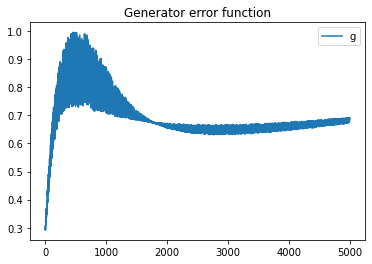

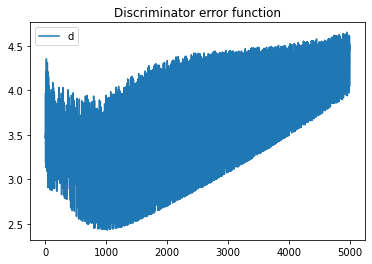

In [15]:
#Plotting the errors in the generator
plt.plot(errors_generator)
#Setting plot title
plt.title("Generator error function")
#Setting legend
plt.legend("g")
plt.show()


#Plotting the errors in the discriminator
plt.plot(errors_discriminator)
#Setting plot title
plt.title("Discriminator error function")
#Setting legend
plt.legend('d')

**Question**

Practice modifying the code above by setting the `learning_rate` equal to `0.05` and train your model again.

Although this change may seem small compared to its original value, what changes do you observe in the plots of the errors for the generator and the discriminator?

**CLICK ON THIS CELL TO TYPE YOUR ANSWER**

**Question**

Practice modifying the code above by setting the `learning_rate` equal to `0.07` and train your model again.

What changes do you observe in the plots of the discriminator errors compared to the values we had when the learning rate was equal to 0.05?

**CLICK ON THIS CELL TO TYPE YOUR ANSWER**

**Question**

Practice modifying the code above by increasing both the `learning_rate` to `0.07` and `epochs` to `10000`. Train  your model again and plot the results. What do you observe?

**CLICK ON THIS CELL TO TYPE YOUR ANSWER**